CSTR Calculation

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [47]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'DejaVu Serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 1.5,
    'grid.alpha': 0.5
})

In [48]:
V = 0.1
CA0 = 100
n_reactants = 2
n_products = 1
delta_n = n_products - n_reactants
epsilon_A = delta_n / n_reactants
print(f"Expansion factor (epsilon_A): {epsilon_A:.2f}")

data = [
    {"Run": 1, "v0": 10.0, "CAf": 85.7},
    {"Run": 2, "v0": 3.0, "CAf": 66.7},
    {"Run": 3, "v0": 1.2, "CAf": 50.0},
    {"Run": 4, "v0": 0.5, "CAf": 33.4}
]

Expansion factor (epsilon_A): -0.50


In [49]:
def calculate_conversion_rate(v0, CA0, CAf, epsilon_A, V):
    CA_ratio = CAf / CA0
    XA = (1 - CA_ratio) / (1 + epsilon_A * CA_ratio)
    rA = (v0 * CA0 * XA) / V
    return XA, rA

results = []

In [50]:
for run in data:
    v0 = run["v0"]
    CAf = run["CAf"]
    XA, rA = calculate_conversion_rate(v0, CA0, CAf, epsilon_A, V)
    results.append({
        "Run": run["Run"],
        "v0 (L/hr)": v0,
        "CAf (mmol/L)": CAf,
        "Conversion (X_A)": XA,
        "Rate of Reaction (-r_A) (mmol/L-hr)": rA
    })

In [51]:
df_results = pd.DataFrame(results)
print("\nResults of Conversion and Rate of Reaction:")
print(df_results)

CAf_values = df_results["CAf (mmol/L)"].values
rA_values = df_results["Rate of Reaction (-r_A) (mmol/L-hr)"].values

log_CA = np.log10(CAf_values)
log_rA = np.log10(rA_values)

slope, intercept, r_value, p_value, std_err = linregress(log_CA, log_rA)

n = slope
K = 10**intercept
R_squared = r_value**2


Results of Conversion and Rate of Reaction:
   Run  v0 (L/hr)  CAf (mmol/L)  Conversion (X_A)  \
0    1       10.0          85.7          0.250219   
1    2        3.0          66.7          0.499625   
2    3        1.2          50.0          0.666667   
3    4        0.5          33.4          0.799520   

   Rate of Reaction (-r_A) (mmol/L-hr)  
0                          2502.187227  
1                          1498.874719  
2                           800.000000  
3                           399.759904  



Reaction order (n): 1.96
Rate constant (K): 0.40 mmol^(1-n) L^n / hr
R^2 value of fitting curve: 0.9971


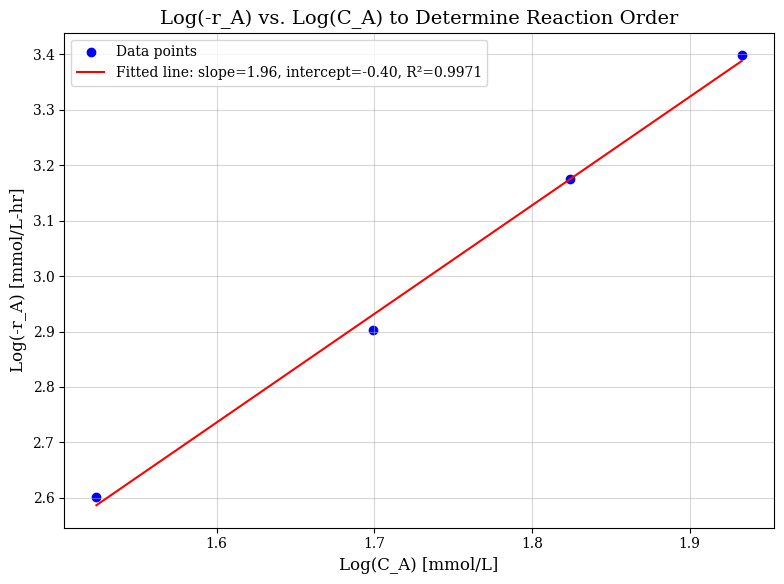

In [52]:
print(f"\nReaction order (n): {n:.2f}")
print(f"Rate constant (K): {K:.2f} mmol^(1-n) L^n / hr")
print(f"R^2 value of fitting curve: {R_squared:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(log_CA, log_rA, label="Data points", color="blue")
plt.plot(log_CA, intercept + slope * log_CA, 'r', label=f"Fitted line: slope={slope:.2f}, intercept={intercept:.2f}, R²={R_squared:.4f}")

plt.title("Log(-r_A) vs. Log(C_A) to Determine Reaction Order", fontsize=14)
plt.xlabel("Log(C_A) [mmol/L]", fontsize=12)
plt.ylabel("Log(-r_A) [mmol/L-hr]", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PFR Calculation

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import linregress

In [70]:
V = 0.1
CA0 = 100
epsilon_A = -1 / 2

In [71]:
data = [
    {"Run": 1, "v0": 10.0, "CAf": 85.7},
    {"Run": 2, "v0": 3.0, "CAf": 66.7},
    {"Run": 3, "v0": 1.2, "CAf": 50.0},
    {"Run": 4, "v0": 0.5, "CAf": 33.4}
]

In [72]:

def calculate_rate_pfr(v0, CA0, CAf, epsilon_A, V, n, K):
    XA = (1 - CAf / CA0) / (1 + epsilon_A * CAf / CA0)
    if XA <= 0 or XA > 1:
        raise ValueError(f"Invalid conversion (X_A): {XA:.4f}")
    integral_value, _ = quad(lambda XA_local: 1 / (CA0 * (XA_local ** n) * K), 0, XA)
    rA = v0 / (V * integral_value)
    return XA, abs(rA)

results = []
n, K = 2, 0.36

In [73]:
for run in data:
    try:
        XA, rA = calculate_rate_pfr(run["v0"], CA0, run["CAf"], epsilon_A, V, n, K)
        results.append({
            "Run": run["Run"],
            "v0 (L/hr)": run["v0"],
            "CAf (mmol/L)": run["CAf"],
            "Conversion (X_A)": XA,
            "Rate of Reaction (r_A) (mmol/L-hr)": rA
        })
    except ValueError as e:
        print(f"Error in Run {run['Run']}: {e}")

df_results = pd.DataFrame(results)
print("\nResults of Conversion and Rate of Reaction:")
print(df_results)



Results of Conversion and Rate of Reaction:
   Run  v0 (L/hr)  CAf (mmol/L)  Conversion (X_A)  \
0    1       10.0          85.7          0.250219   
1    2        3.0          66.7          0.499625   
2    3        1.2          50.0          0.666667   
3    4        0.5          33.4          0.799520   

   Rate of Reaction (r_A) (mmol/L-hr)  
0                          900.787402  
1                          539.594899  
2                          288.000000  
3                          143.913565  


<ipython-input-72-d47a3ccf01e5>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_value, _ = quad(lambda XA_local: 1 / (CA0 * (XA_local ** n) * K), 0, XA)


In [74]:
CAf_values = df_results["CAf (mmol/L)"].values
rA_values = df_results["Rate of Reaction (r_A) (mmol/L-hr)"].values
log_CA = np.log10(CAf_values)
log_rA = np.log10(rA_values)

slope, intercept, r_value, _, _ = linregress(log_CA, log_rA)
n_new, K_new = slope, 10 ** intercept
R_squared = r_value ** 2


Reaction order (n): 1.96
Rate constant (K): 0.14 mmol^(1-n) L^n / hr
R^2 value of fitting curve: 0.9971


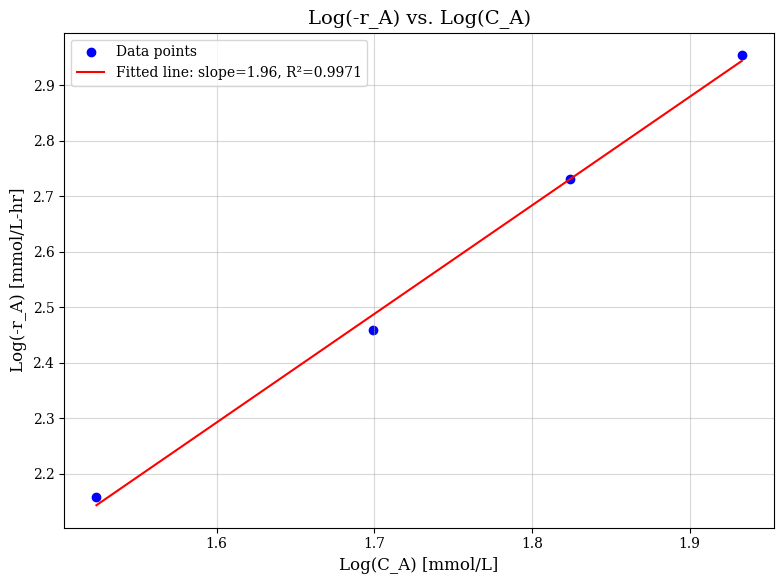

In [75]:
print(f"\nReaction order (n): {n_new:.2f}")
print(f"Rate constant (K): {K_new:.2f} mmol^(1-n) L^n / hr")
print(f"R^2 value of fitting curve: {R_squared:.4f}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(log_CA, log_rA, label="Data points", color="blue")
plt.plot(log_CA, intercept + slope * log_CA, 'r', label=f"Fitted line: slope={slope:.2f}, R²={R_squared:.4f}")
plt.title("Log(-r_A) vs. Log(C_A)", fontsize=14)
plt.xlabel("Log(C_A) [mmol/L]", fontsize=12)
plt.ylabel("Log(-r_A) [mmol/L-hr]", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Batch Reactor Calculation- Assuming Constant Density System

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [62]:
C = np.array([100, 85.7, 66.7, 50, 33.4])
t = np.array([0, 0.01, 0.033333333, 0.083333333, 0.2])
t_seconds = t * 3600

n_values = np.arange(0.1, 10, 0.1)
r2_n_values = []

In [63]:
for n in n_values:
    C_nth = C**(1-n)
    coeff_nth = np.polyfit(t_seconds, C_nth, 1)
    r2_n_values.append(r2_score(C_nth, np.polyval(coeff_nth, t_seconds)))

In [64]:
optimal_n_index = np.argmax(r2_n_values)
optimal_n = n_values[optimal_n_index]
optimal_r2 = r2_n_values[optimal_n_index]

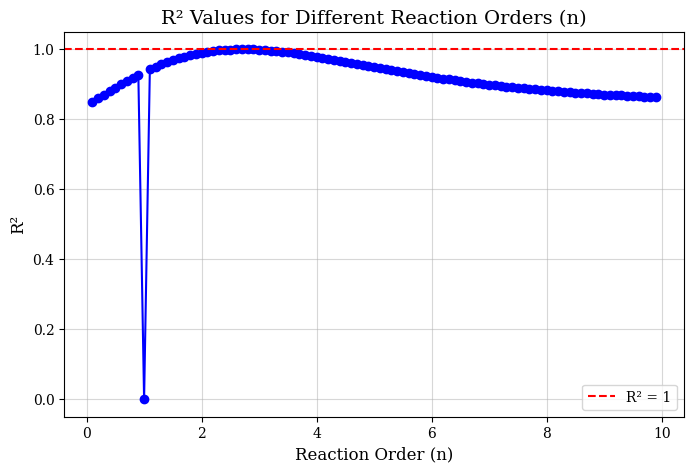

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(n_values, r2_n_values, 'b-o')
plt.axhline(y=1, color='r', linestyle='--', label='R² = 1')
plt.title('R² Values for Different Reaction Orders (n)')
plt.xlabel('Reaction Order (n)')
plt.ylabel('R²')
plt.grid(True)
plt.legend()
plt.show()

Optimal reaction order (n): 2.70
R² value for optimal n: 0.9997


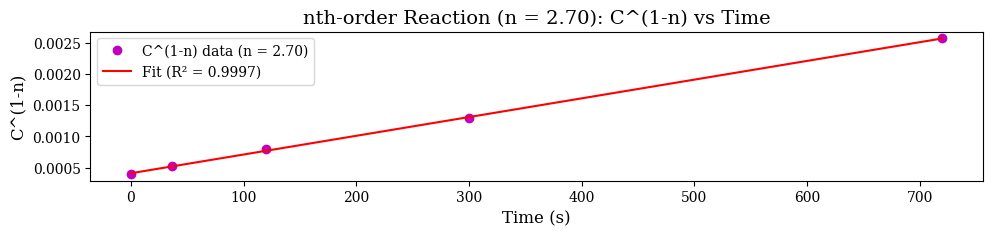

In [66]:
print(f"Optimal reaction order (n): {optimal_n:.2f}")
print(f"R² value for optimal n: {optimal_r2:.4f}")

C_optimal_nth = C**(1-optimal_n)
coeff_optimal_nth = np.polyfit(t_seconds, C_optimal_nth, 1)
C_optimal_nth_pred = np.polyval(coeff_optimal_nth, t_seconds)

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 4)
plt.plot(t_seconds, C_optimal_nth, 'mo', label=f'C^(1-n) data (n = {optimal_n:.2f})')
plt.plot(t_seconds, C_optimal_nth_pred, 'r-', label=f'Fit (R² = {optimal_r2:.4f})')
plt.title(f'nth-order Reaction (n = {optimal_n:.2f}): C^(1-n) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('C^(1-n)')
plt.legend()
plt.tight_layout()
plt.show()